In [1]:
# !pip install spinesTS
import sys
sys.path.append('..')

# MLPTorchModel

In [2]:
from spinesTS.preprocessing import split_series
from sklearn.preprocessing import StandardScaler
from spinesTS.plotting import plot2d
from sklearn.metrics import r2_score

In [3]:
from spinesTS.pipeline import Pipeline

In [4]:
from spinesTS.data import BuiltInSeriesData
from spinesTS.nn import RecurrentWeightedDenseNet
from spinesTS.metrics import mean_absolute_error
from spinesTS.metrics import mean_absolute_percentage_error

In [5]:
series_data = BuiltInSeriesData()

Existing CSV file list: 
>> >> >> >> >> >> >> >> >> >> 
    Electric_Production
    Messages_Sent
    Messages_Sent_Hour
    Series_0
    Series_1
    Series_2
    Series_3
    Series_4
    Series_5
    Series_6
    Series_7
    Series_8
    Series_9
    Supermarket_Incoming
    Web_Sales
    __init__
<< << << << << << << << << << 


In [6]:
cs = series_data['Series_0']
cs_data = cs.dataset['turnover_1']
x_train_cs, x_test_cs, y_train_cs, y_test_cs = split_series(cs_data, cs_data, 420, 420, train_size=0.8)

## RecurrentWeightedDenseNet

### one res_dense_blocks

Epoch 1/1000 
282/282 - p0 - loss: 105.2760 - mae: 72.5736 - val_loss: 80.1298 - val_mae: 80.6281 - 12.08s/epoch - 0.043s/step
Epoch 2/1000 
282/282 - p1 - loss: 92.1616 - mae: 43.7726 - val_loss: 89.0263 - val_mae: 89.5252 - 12.05s/epoch - 0.043s/step
Epoch 3/1000 
282/282 - p2 - loss: 93.7137 - mae: 44.8359 - val_loss: 84.5984 - val_mae: 85.0972 - 12.07s/epoch - 0.043s/step
Epoch 4/1000 
282/282 - p3 - loss: 90.9032 - mae: 43.8210 - val_loss: 92.2204 - val_mae: 92.7195 - 12.04s/epoch - 0.043s/step
Epoch 5/1000 
282/282 - p4 - loss: 90.0658 - mae: 43.6765 - val_loss: 85.6027 - val_mae: 86.1016 - 12.06s/epoch - 0.043s/step
Epoch 6/1000 
282/282 - p5 - loss: 87.2120 - mae: 42.9210 - val_loss: 91.6470 - val_mae: 92.1460 - 11.95s/epoch - 0.042s/step
Epoch 7/1000 
282/282 - p6 - loss: 85.5382 - mae: 42.1193 - val_loss: 90.4620 - val_mae: 90.9609 - 11.78s/epoch - 0.042s/step
Epoch 8/1000 
282/282 - p7 - loss: 84.6463 - mae: 41.2202 - val_loss: 88.9935 - val_mae: 89.4924 - 11.80s/epoch - 0.0

Epoch 66/1000 
282/282 - p1 - loss: 48.8924 - mae: 21.9970 - val_loss: 78.4283 - val_mae: 78.9273 - 12.23s/epoch - 0.043s/step
Epoch 67/1000 
282/282 - p2 - loss: 48.2626 - mae: 21.8742 - val_loss: 74.7646 - val_mae: 75.2635 - 12.18s/epoch - 0.043s/step
Epoch 68/1000 
282/282 - p0 - loss: 48.4743 - mae: 21.6285 - val_loss: 70.9108 - val_mae: 71.4096 - 12.24s/epoch - 0.043s/step
Epoch 69/1000 
282/282 - p1 - loss: 48.6532 - mae: 21.4345 - val_loss: 79.9833 - val_mae: 80.4824 - 12.17s/epoch - 0.043s/step
Epoch 70/1000 
282/282 - p2 - loss: 47.9413 - mae: 21.2473 - val_loss: 77.6714 - val_mae: 78.1704 - 12.15s/epoch - 0.043s/step
Epoch 71/1000 
282/282 - p0 - loss: 47.7372 - mae: 21.1865 - val_loss: 70.9092 - val_mae: 71.4079 - 12.23s/epoch - 0.043s/step
Epoch 72/1000 
282/282 - p1 - loss: 47.2306 - mae: 21.1171 - val_loss: 75.3421 - val_mae: 75.8410 - 12.12s/epoch - 0.043s/step
Epoch 73/1000 
282/282 - p2 - loss: 47.0055 - mae: 21.0649 - val_loss: 78.4797 - val_mae: 78.9787 - 12.10s/epoc

Epoch 130/1000 
282/282 - p8 - loss: 39.8108 - mae: 18.5964 - val_loss: 78.4353 - val_mae: 78.9342 - 11.97s/epoch - 0.042s/step
Epoch 131/1000 
282/282 - p9 - loss: 39.3175 - mae: 18.6296 - val_loss: 81.7372 - val_mae: 82.2362 - 11.88s/epoch - 0.042s/step
Epoch 132/1000 
282/282 - p10 - loss: 39.3329 - mae: 18.6298 - val_loss: 79.2263 - val_mae: 79.7252 - 11.87s/epoch - 0.042s/step
Epoch 133/1000 
282/282 - p11 - loss: 39.5068 - mae: 18.6322 - val_loss: 75.1582 - val_mae: 75.6571 - 12.06s/epoch - 0.043s/step
Epoch 134/1000 
282/282 - p12 - loss: 39.8641 - mae: 18.6075 - val_loss: 72.3041 - val_mae: 72.8028 - 12.06s/epoch - 0.043s/step
Epoch 135/1000 
282/282 - p13 - loss: 39.4929 - mae: 18.5614 - val_loss: 76.6170 - val_mae: 77.1159 - 11.91s/epoch - 0.042s/step
Epoch 136/1000 
282/282 - p14 - loss: 39.2022 - mae: 18.5357 - val_loss: 78.9603 - val_mae: 79.4592 - 11.88s/epoch - 0.042s/step
Epoch 137/1000 
282/282 - p15 - loss: 39.1813 - mae: 18.4719 - val_loss: 75.8896 - val_mae: 76.3885

Epoch 194/1000 
282/282 - p72 - loss: 35.7324 - mae: 17.3262 - val_loss: 79.9428 - val_mae: 80.4418 - 11.97s/epoch - 0.042s/step
Epoch 195/1000 
282/282 - p73 - loss: 35.4133 - mae: 17.3029 - val_loss: 74.6024 - val_mae: 75.1012 - 11.88s/epoch - 0.042s/step
Epoch 196/1000 
282/282 - p74 - loss: 35.1367 - mae: 17.2818 - val_loss: 77.1201 - val_mae: 77.6190 - 11.88s/epoch - 0.042s/step
Epoch 197/1000 
282/282 - p75 - loss: 35.0815 - mae: 17.2305 - val_loss: 78.9493 - val_mae: 79.4482 - 12.01s/epoch - 0.043s/step
Epoch 198/1000 
282/282 - p76 - loss: 35.0215 - mae: 17.1887 - val_loss: 76.8450 - val_mae: 77.3439 - 12.12s/epoch - 0.043s/step
Epoch 199/1000 
282/282 - p77 - loss: 35.1059 - mae: 17.1346 - val_loss: 76.8588 - val_mae: 77.3577 - 12.10s/epoch - 0.043s/step
Epoch 200/1000 
282/282 - p78 - loss: 35.1278 - mae: 17.1280 - val_loss: 79.3519 - val_mae: 79.8508 - 12.12s/epoch - 0.043s/step
Epoch 201/1000 
282/282 - p79 - loss: 34.6895 - mae: 17.1240 - val_loss: 78.1274 - val_mae: 78.62

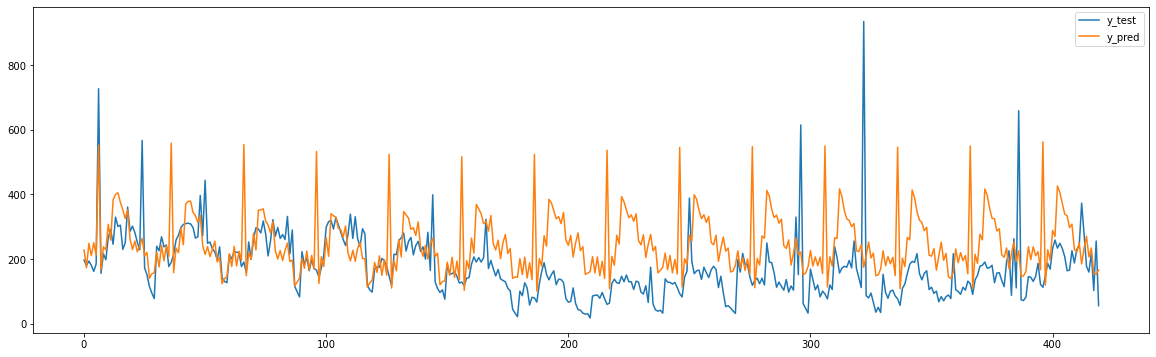

In [8]:
multi_reg = RecurrentWeightedDenseNet(420, 420, random_seed=666, res_dense_blocks=6, learning_rate=0.001)
multi_reg.fit(x_train_cs, y_train_cs, eval_set=(x_test_cs[:-2], y_test_cs[:-2]), batch_size=32,
             min_delta=0, patience=100, epochs=1000, verbose=True)
y_pred_cs = multi_reg.predict(x_test_cs[-2:])
print(f"r2: {r2_score(y_test_cs[-2:].T, y_pred_cs.T)}")
print(f"mae: {mean_absolute_error(y_test_cs[-2:], y_pred_cs)}")
print(f"mape: {mean_absolute_percentage_error(y_test_cs[-2:], y_pred_cs)}")
plot2d(y_test_cs[-2:], y_pred_cs, fig_num_or_slice=slice(-1, None), labels=['y_test', 'y_pred'])

### two res_dense_blocks

r2: -0.9631024142347212
mae: 91.58584717795962
mape: 0.7204733330717152


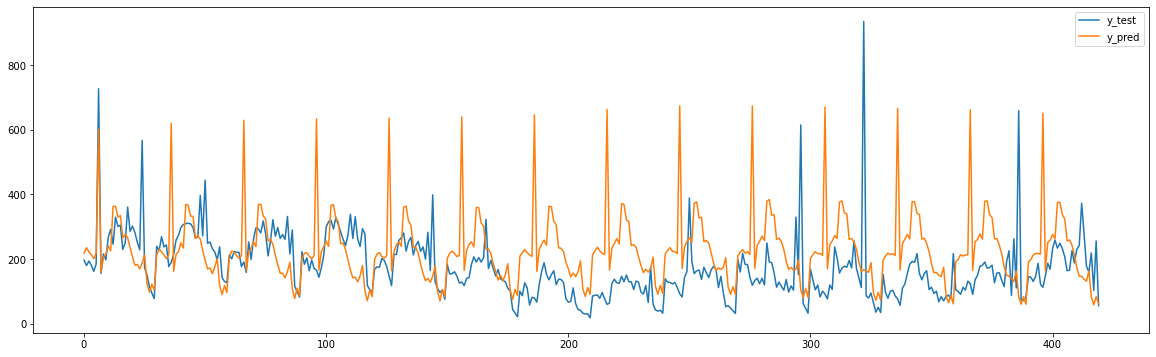

In [8]:
multi_reg = RecurrentWeightedDenseNet(420, 420, random_seed=666, res_dense_blocks=2, learning_rate=0.001)
multi_reg.fit(x_train_cs, y_train_cs, eval_set=(x_test_cs[:-2], y_test_cs[:-2]), batch_size=32,
             min_delta=0, patience=100, epochs=1000, verbose=False)
y_pred_cs = multi_reg.predict(x_test_cs[-2:])
print(f"r2: {r2_score(y_test_cs[-2:].T, y_pred_cs.T)}")
print(f"mae: {mean_absolute_error(y_test_cs[-2:], y_pred_cs)}")
print(f"mape: {mean_absolute_percentage_error(y_test_cs[-2:], y_pred_cs)}")
plot2d(y_test_cs[-2:], y_pred_cs, fig_num_or_slice=slice(-1, None), labels=['y_test', 'y_pred'])

### four res_dense_blocks

r2: -0.7024661308459873
mae: 88.35414064044045
mape: 0.7214534844837018


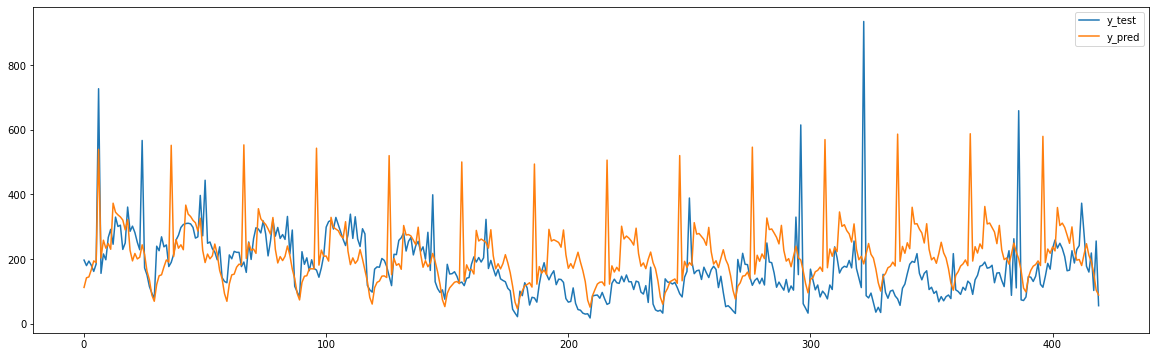

In [9]:
multi_reg = RecurrentWeightedDenseNet(420, 420, random_seed=666, res_dense_blocks=4, learning_rate=0.001)
multi_reg.fit(x_train_cs, y_train_cs, eval_set=(x_test_cs[:-2], y_test_cs[:-2]), batch_size=32,
             min_delta=0, patience=100, epochs=1000, verbose=False)
y_pred_cs = multi_reg.predict(x_test_cs[-2:])
print(f"r2: {r2_score(y_test_cs[-2:].T, y_pred_cs.T)}")
print(f"mae: {mean_absolute_error(y_test_cs[-2:], y_pred_cs)}")
print(f"mape: {mean_absolute_percentage_error(y_test_cs[-2:], y_pred_cs)}")
plot2d(y_test_cs[-2:], y_pred_cs, fig_num_or_slice=slice(-1, None), labels=['y_test', 'y_pred'])

### one res_dense_blocks with standard scaler

r2: -0.7512148786583465
mae: 93.32017397199358
mape: 0.7605703743009655


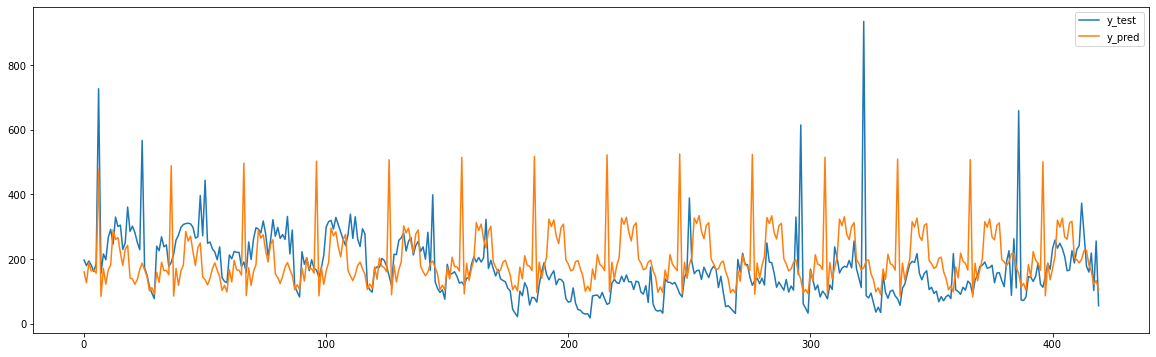

In [10]:
pp = Pipeline([
    ('sc', StandardScaler()),
    ('model', RecurrentWeightedDenseNet(420, 420, random_seed=666, res_dense_blocks=1, learning_rate=0.001))
])

pp.fit(x_train_cs, y_train_cs, eval_set=(x_test_cs[:-2], y_test_cs[:-2]), batch_size=32,
             min_delta=0, patience=100, epochs=1000, verbose=False)
y_pred_cs = pp.predict(x_test_cs[-2:])
print(f"r2: {r2_score(y_test_cs[-2:].T, y_pred_cs.T)}")
print(f"mae: {mean_absolute_error(y_test_cs[-2:], y_pred_cs)}")
print(f"mape: {mean_absolute_percentage_error(y_test_cs[-2:], y_pred_cs)}")
plot2d(y_test_cs[-2:], y_pred_cs, fig_num_or_slice=slice(-1, None), labels=['y_test', 'y_pred'])

r2: 0.43177702397035866
mae: 69.8984997692658
mape: 0.38500695461808654


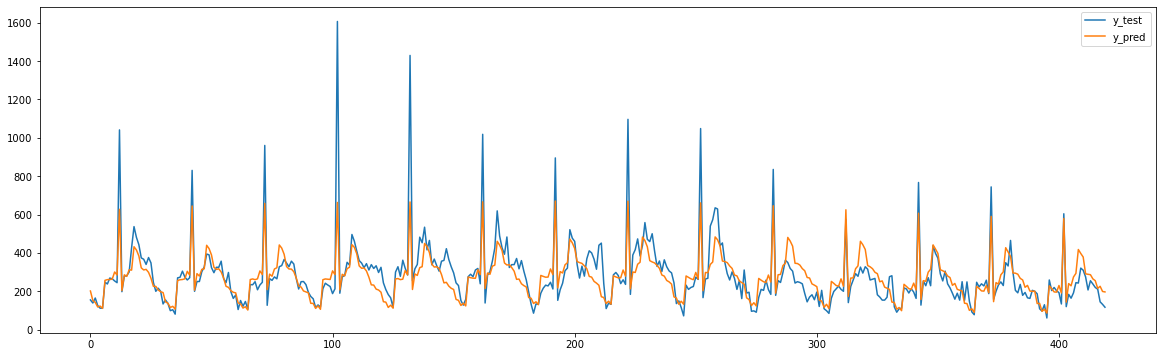

In [11]:
y_pred_cs = pp.predict(x_test_cs[:-2])
print(f"r2: {r2_score(y_test_cs[:-2].T, y_pred_cs.T)}")
print(f"mae: {mean_absolute_error(y_test_cs[:-2], y_pred_cs)}")
print(f"mape: {mean_absolute_percentage_error(y_test_cs[:-2], y_pred_cs)}")
plot2d(y_test_cs[:-2], y_pred_cs, fig_num_or_slice=slice(0, 1), labels=['y_test', 'y_pred'])